In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import numpy as np
import sklearn
import sklearn.datasets
import matplotlib.pyplot as plt

In [2]:
onion_df = pd.read_csv('Resources/OnionOrNot.csv')  

In [3]:
#swap the 0s and 1s around in the onion_df so that 0 = false and 1 = true like the fake and real csv files
onion_df.head()

,text,label
0,Entire Facebook Staff Laughs As Man Tightens P...,1
1,Muslim Woman Denied Soda Can for Fear She Coul...,0
2,Bold Move: Hulu Has Announced That They’re Gon...,1
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1
4,"For men looking for great single women, online...",1


In [4]:
onion_df = onion_df.replace({0:1, 1:0})

In [5]:
onion_df.head()

,text,label
0,Entire Facebook Staff Laughs As Man Tightens P...,0
1,Muslim Woman Denied Soda Can for Fear She Coul...,1
2,Bold Move: Hulu Has Announced That They’re Gon...,0
3,Despondent Jeff Bezos Realizes He’ll Have To W...,0
4,"For men looking for great single women, online...",0


In [6]:
#remove stopwords
stop = set(stopwords.words('english'))

onion_df["filtered"] = onion_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [7]:
onion_df.head()

,text,label,filtered
0,Entire Facebook Staff Laughs As Man Tightens P...,0,Entire Facebook Staff Laughs As Man Tightens P...
1,Muslim Woman Denied Soda Can for Fear She Coul...,1,Muslim Woman Denied Soda Can Fear She Could Us...
2,Bold Move: Hulu Has Announced That They’re Gon...,0,Bold Move: Hulu Has Announced That They’re Gon...
3,Despondent Jeff Bezos Realizes He’ll Have To W...,0,Despondent Jeff Bezos Realizes He’ll Have To W...
4,"For men looking for great single women, online...",0,"For men looking great single women, online dat..."


In [8]:
onion_or_not = onion_df.groupby(["label"]).agg({"text": "count"})

In [9]:
onion_or_not

,text
label,
0,9000
1,15000


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(onion_df["filtered"], onion_df["label"], random_state=0)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)

In [12]:
X_train_vectorised = vect.transform(X_train)

X_train_vectorised

<18000x21671 sparse matrix of type '<class 'numpy.int64'>'
	with 190104 stored elements in Compressed Sparse Row format>

In [13]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorised, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
from sklearn.metrics import roc_auc_score


predictions = model.predict(vect.transform(X_test))

accuracy_value = roc_auc_score(y_test, predictions)

print('Area Under Curve Score: ', accuracy_value)


Area Under Curve Score:  0.8851953942010788


In [22]:
X_test.values[1]

'ISIS Suicide Bombing Instructor Accidentally Blows Class, amusing locals'

In [23]:
y_test.values[1]

1

In [24]:
#testing the model with X test data

model.predict(vect.transform(["ISIS Suicide Bombing Instructor Accidentally Blows Class, amusing locals"]))

array([1], dtype=int64)

In [18]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, predictions , labels=[0, 1])

Text(0.5, 15.0, 'predictions')

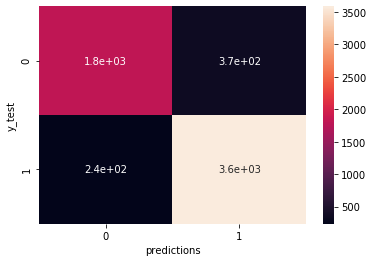

In [19]:
#plot the confusion matrix
import seaborn as sns 
ax= plt.subplot()
sns.heatmap(con_matrix, annot=True, ax= ax)
ax.set_ylabel('y_test')
ax.set_xlabel('predictions')